# Exploratory Data Analysis (EDA).

### 1. Import Required Libraries


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

### 2. Set Up Paths

In [ ]:
# Define the paths for images and labels.
train_image_dir = "/kaggle/input/xr-bones-dataset-for-bone-fracture-detection/YOLODataSet/images/train"
train_label_dir = "/kaggle/input/xr-bones-dataset-for-bone-fracture-detection/YOLODataSet/labels/train"
val_image_dir = "/kaggle/input/xr-bones-dataset-for-bone-fracture-detection/YOLODataSet/images/val"
val_label_dir = "/kaggle/input/xr-bones-dataset-for-bone-fracture-detection/YOLODataSet/labels/val"

In [ ]:
# def check_label_existence(image_dir, label_dir):
#     missing_labels = []
#     image_paths = glob.glob(os.path.join(image_dir, '*.png'))
    
#     for image_path in image_paths:
#         label_path = os.path.join(label_dir, os.path.basename(image_path).replace('.png', '.txt'))
#         if not os.path.exists(label_path):
#             missing_labels.append(label_path)
    
#     return missing_labels

# # Check for missing labels in the training and validation sets
# missing_train_labels = check_label_existence(train_image_dir, train_label_dir)
# missing_val_labels = check_label_existence(val_image_dir, val_label_dir)

# print("Missing training labels:", len(missing_train_labels))
# print("Missing validation labels:", len(missing_val_labels))

### Load The Dataset

In [ ]:
def c_dataset(image_dir, label_dir):
    image_paths = glob.glob(os.path.join(image_dir, '*.png'))
    dataset = []
    logs = []
    
    for image_path in image_paths:
        label_path = os.path.join(label_dir, os.path.basename(image_path).replace('.png', '.txt'))
        if not os.path.exists(label_path):
            logs.append(f"Warning: Missing label for {image_path}. Skipping.")
            continue  # Skip this image if the label doesn't exist
        
        with open(label_path, 'r') as file:
            labels = file.readlines()
        
        dataset.append({
            'image_path': image_path,
            'label_path': label_path,
            'labels': labels
        })
    
    return dataset, logs

In [ ]:
# Load training and validation datasets
train_dataset, logs = c_dataset(train_image_dir, train_label_dir)
val_dataset, logs = c_dataset(val_image_dir, val_label_dir)

In [ ]:
# import os
# import glob
# from PIL import Image
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# def display_one_image_per_class(dataset, num_classes=10):
#     """
#     Display one image for each class with bounding boxes.

#     Parameters:
#     dataset (list): A list of dictionaries containing image paths and label data.
#     num_classes (int): Number of classes to show images for. Default is 10.
#     """
#     class_examples = {}
    
#     # Iterate through the dataset to find one example per class
#     for data in dataset:
#         image_path = data['image_path']
#         labels = data['labels']
        
#         for label in labels:
#             label_info = label.strip().split()
#             class_name = label_info[0]
            
#             # If this class is not in the dictionary, add it
#             if class_name not in class_examples:
#                 class_examples[class_name] = {
#                     'image_path': image_path,
#                     'labels': labels
#                 }
                
#             # Stop once we have at least one example for each class
#             if len(class_examples) >= num_classes:
#                 break
#         if len(class_examples) >= num_classes:
#             break

#     # Display each class example
#     for class_name, data in class_examples.items():
#         image_path = data['image_path']
#         labels = data['labels']
        
#         # Open the image
#         image = Image.open(image_path)
#         fig, ax = plt.subplots(1)
#         ax.imshow(image)
        
#         # Get image dimensions
#         width, height = image.size
        
#         # Draw bounding boxes
#         for label in labels:
#             label_info = label.strip().split()
#             class_name_label = label_info[0]
#             x_min, y_min, x_max, y_max = map(float, label_info[1:])

#             # Convert to absolute coordinates if they are normalized
#             x_min_abs = x_min * width
#             y_min_abs = y_min * height
#             x_max_abs = x_max * width
#             y_max_abs = y_max * height

#             # Calculate width and height of the bounding box
#             box_width = x_max_abs - x_min_abs
#             box_height = y_max_abs - y_min_abs
            
#             # Create a rectangle patch
#             bbox = patches.Rectangle((x_min_abs, y_min_abs), box_width, box_height,
#                                      linewidth=2, edgecolor='r', facecolor='none')
            
#             # Add the patch to the plot
#             ax.add_patch(bbox)
#             # Add class label text
#             ax.text(x_min_abs, y_min_abs, class_name_label, color='white',
#                     fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
        
#         # Set title to indicate the class
#         plt.title(f"Class: {class_name}")
#         # Display the image
#         plt.show()

# # Example usage with the dataset generated from the provided c_dataset function
# # Assuming dataset and logs are obtained as:
# # dataset, logs = c_dataset(image_dir, label_dir)

# # Uncomment the following line and run if dataset is available
# display_one_image_per_class(train_dataset, num_classes=10)

### Class Distribution

In [ ]:
# # Extract class IDs from labels
# def extract_class_ids(dataset):
#     class_ids = []
#     for data in dataset:
#         for label in data['labels']:
#             class_id = int(label.split()[0])
#             class_ids.append(class_id)
#     return class_ids

# # Class names
# class_names = [
#     'XR_ELBOW_positive', 'XR_FINGER_positive', 'XR_FOREARM_positive',
#     'XR_HAND_positive', 'XR_SHOULDER_positive',
#     'XR_ELBOW_negative', 'XR_FINGER_negative', 'XR_FOREARM_negative',
#     'XR_HAND_negative', 'XR_SHOULDER_negative'
# ]

# # Count the occurrences of each class
# class_ids = extract_class_ids(train_dataset)
# class_distribution = pd.Series(class_ids).value_counts().sort_index()

# # Create a DataFrame for better visualization
# class_distribution_df = pd.DataFrame({
#     'class_id': class_distribution.index,
#     'count': class_distribution.values
# })

In [ ]:
# # Map class IDs to names
# class_distribution_df['class_name'] = class_distribution_df['class_id'].map(lambda x: class_names[x])

# # Plot class distribution
# plt.figure(figsize=(12, 8))
# sns.barplot(x='class_name', y='count', data=class_distribution_df)
# plt.title('Class Distribution in Training Dataset')
# plt.xticks(rotation=45)
# plt.ylabel('Count')
# plt.xlabel('Class Name')
# plt.show()

### Image Size Distribution

In [ ]:
# def get_image_sizes(dataset):
#     sizes = []
#     for data in dataset:
#         image = cv2.imread(data['image_path'])
#         height, width, _ = image.shape
#         sizes.append((width, height))
#     return sizes

# # Get sizes and create DataFrame
# image_sizes = get_image_sizes(train_dataset)
# size_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# # Plot the distribution of image sizes
# plt.figure(figsize=(12, 6))
# sns.histplot(size_df['Width'], bins=30, kde=True, color='blue', label='Width')
# sns.histplot(size_df['Height'], bins=30, kde=True, color='red', label='Height')
# plt.title('Image Size Distribution')
# plt.xlabel('Pixel Size')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

### Label Analysis

In [ ]:
# def parse_labels(dataset):
#     all_bboxes = []
#     for data in dataset:
#         for label in data['labels']:
#             parts = label.strip().split()
#             if len(parts) > 1:  # Ensure there are bounding box coordinates
#                 class_id = int(parts[0])
#                 x_center, y_center, width, height = map(float, parts[1:])
#                 all_bboxes.append((class_id, x_center, y_center, width, height))
#     return all_bboxes

# # Parse bounding boxes
# bboxes = parse_labels(train_dataset)
# bbox_df = pd.DataFrame(bboxes, columns=['class_id', 'x_center', 'y_center', 'width', 'height'])

# # Plot bounding box sizes
# plt.figure(figsize=(12, 6))
# sns.histplot(bbox_df['width'], bins=30, kde=True, color='green', label='Width')
# sns.histplot(bbox_df['height'], bins=30, kde=True, color='orange', label='Height')
# plt.title('Bounding Box Size Distribution')
# plt.xlabel('Size (normalized)')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

### Correlation Analysis

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='class_id', y='width', data=bbox_df)
# plt.title('Bounding Box Width by Class ID')
# plt.xlabel('Class ID')
# plt.ylabel('Bounding Box Width (normalized)')
# plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
# plt.show()

## Geneate Images and Make Balance

In [ ]:
import random

def data_generator(images_dir, labels_dir, batch_size=16, image_size=(512, 512), num_classes=10, num_anchors=3):
    image_files = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))])
    label_files = sorted([os.path.join(labels_dir, f.replace('.jpg', '.txt').replace('.png', '.txt')) for f in os.listdir(images_dir)])
    _ = []
    def parse_label_file(label_file):
        class_labels = np.zeros((num_classes,), dtype=np.float32)
        bboxes = np.zeros((num_classes, 4), dtype=np.float32)  # For storing up to num_classes boxes
        
        try:
            with open(label_file, 'r') as f:
                for line in f.readlines():
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())
                    class_labels[int(class_id)] = 1  # One-hot encoding
                    # Assuming you want to store bbox in (x_min, y_min, x_max, y_max)
                    bboxes[int(class_id)] = [x_center - width / 2, y_center - height / 2, 
                                              x_center + width / 2, y_center + height / 2]
        except Exception as e:
            _.append(f"Error reading {label_file}: {e}")

        return class_labels, bboxes

    while True:
        data = list(zip(image_files, label_files))
        random.shuffle(data)
        image_files, label_files = zip(*data)
        
        for start in range(0, len(image_files), batch_size):
            images = []
            # Prepare output arrays
# Local imports
sys.path.append("/workspaces/DetectionXR/")
from src.utils.reg_log import log_inference, log_error
            end = min(start + batch_size, len(image_files))
            batch_image_files = image_files[start:end]
            batch_label_files = label_files[start:end]
            
            for i, (image_file, label_file) in enumerate(zip(batch_image_files, batch_label_files)):
                try:
                    image = cv2.imread(image_file)
                    if image is None:
                        raise FileNotFoundError(f"Image file {image_file} not found or could not be loaded.")
                    image = cv2.resize(image, image_size)
                    image = image / 255.0
                    
                    class_labels, bboxes = parse_label_file(label_file)
                    images.append(image)

                    # Populate class and bounding box labels
                    class_labels_batch[i] = class_labels
                    bbox_labels_batch[i] = bboxes
                    
                    # Assuming one object per anchor for simplicity
                    objectness_labels_batch[i] = [1.0 if class_labels.any() else 0.0] * num_anchors

                except Exception as e:
                    print(f"Error processing {image_file} with {label_file}: {e}")
                    images.append(np.zeros((*image_size, 3), dtype=np.float32))  # Placeholder image
            
            images = np.array(images)
            yield images, (class_labels_batch, bbox_labels_batch, objectness_labels_batch)

In [ ]:
# Create datasets with 10 classes
train_data_generator = data_generator(images_dir=train_image_dir, labels_dir=train_label_dir, num_classes=10)
val_data_generator = data_generator(images_dir=val_image_dir, labels_dir=val_label_dir, num_classes=10)

# Get a batch of training data
train_images, (train_class_labels_batch, train_bbox_labels_batch, train_objectness_labels_batch) = next(train_data_generator)

# Get a batch of validation data
val_images, (val_class_labels_batch, val_bbox_labels_batch, val_objectness_labels_batch) = next(val_data_generator)

# Print the shapes
print("Training data shapes:")
print("Images:", train_images.shape)  # Should be (batch_size, H, W, C)
print("Class Labels:", train_class_labels_batch.shape)  # Should be (batch_size, num_classes)
print("Bounding Box Labels:", train_bbox_labels_batch.shape)  # Should be (batch_size, num_classes, 4)
print("Objectness Labels:", train_objectness_labels_batch.shape)  # Should be (batch_size, num_anchors)

# Build Model use Backbone and FPN, Heads
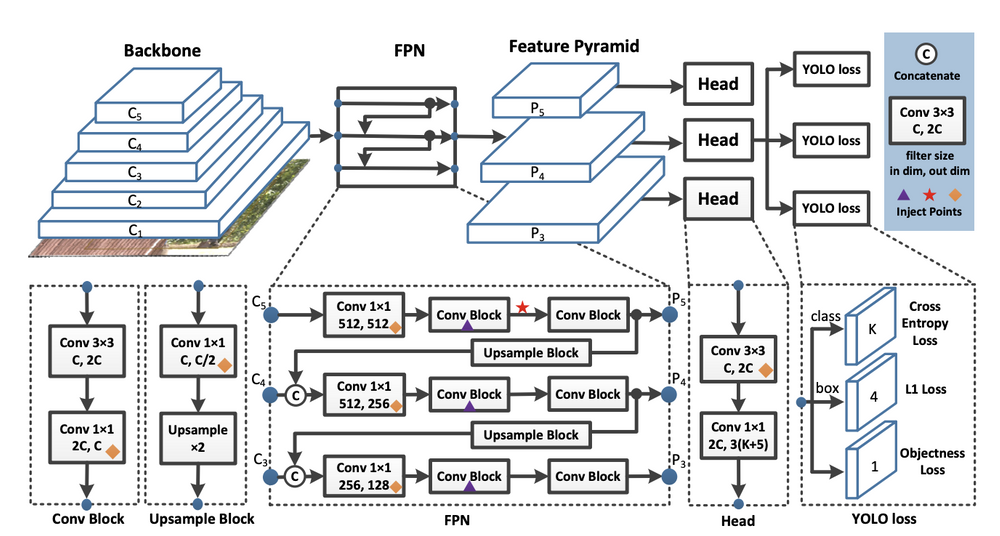

### Summary of Output Shapes:
- `c1`: **(512, 512, 64)**
- `p1`: **(256, 256, 64)**
- `c2`: **(256, 256, 128)**
- `p2`: **(128, 128, 128)**
- `c3`: **(128, 128, 256)**
- `p3`: **(64, 64, 256)**
- `c4`: **(64, 64, 512)**
- `p4`: **(32, 32, 512)**
- `c5`: **(32, 32, 512)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, UpSampling2D, Concatenate, Input, MaxPooling2D, Flatten, BatchNormalization, Reshape
from tensorflow.keras.models import Model

def backbone(input_tensor: tf.Tensor, filters: list = [64, 128, 256, 512, 512]):
    # Convolutional layers with ReLU activations followed by MaxPooling
    c1 = Conv2D(filters[0], (3, 3), activation='relu', padding='same')(input_tensor)
    p1 = MaxPooling2D(pool_size=(2, 2))(c1)  # MaxPooling after c1

    c2 = Conv2D(filters[1], (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D(pool_size=(2, 2))(c2)  # MaxPooling after c2

    c3 = Conv2D(filters[2], (3, 3), activation='relu', padding='same')(p2)
    p3 = MaxPooling2D(pool_size=(2, 2))(c3)  # MaxPooling after c3

    c4 = Conv2D(filters[3], (3, 3), activation='relu', padding='same')(p3)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)  # MaxPooling after c4

    c5 = Conv2D(filters[4], (3, 3), activation='relu', padding='same')(p4)

    return c3, c4, c5  # Returning selected layers for further use in the model



# ConvBlock for feature extraction
def conv_block(input_tensor, dim: int = 512):
    
    x = Conv2D(dim * 2, (3, 3), activation='relu', padding='same')(input_tensor)
    x = Conv2D(dim, (1, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    
    return x

# UpSample Block for increasing resolution
def upsample_block(input_tensor, dim: int = 512):
    x = Conv2D(dim // 2, (1, 1), activation='relu', padding='same')(input_tensor)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(dim , (1, 1), activation='relu', padding='same')(x)
    
    return x

## Create Feature Pyramid Network (FPN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Concatenate, UpSampling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.mixed_precision import set_global_policy
from typing import Tuple

# Set the mixed precision policy
set_global_policy('mixed_float16')

# Check if a GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
assert len(tf.config.list_physical_devices('GPU')) > 0, "No GPU found. Make sure your GPU is installed and recognized by TensorFlow."

# Enable memory growth for GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Using GPU: {gpus[0]}")
    except RuntimeError as e:
        print(e)

# Define the distributed strategy
strategy = tf.distribute.MirroredStrategy()

In [ ]:
# Feature Pyramid Network function
def feature_pyramid_network(backbone_output: Tuple[tf.Tensor, tf.Tensor, tf.Tensor]):
    c3, c4, c5 = backbone_output

    # C5 to P5
    P5_1 = Conv2D(512, (1, 1), activation='relu', padding='same')(c5)
    P5_2 = Conv2D(512, (3, 3), activation='relu', padding='same')(P5_1)
    P5 = Conv2D(512, (3, 3), activation='relu', padding='same')(P5_2)

    # Upsample P5 to match c4's dimensions
    U1 = UpSampling2D(size=(2, 2))(P5)
    C1 = Concatenate()([c4, U1])
    x = Conv2D(512, (1, 1), activation='relu', padding='same')(C1)

    # P4 processing
    P4_1 = Conv2D(256, (1, 1), activation='relu', padding='same')(x)
    P4_2 = Conv2D(256, (3, 3), activation='relu', padding='same')(P4_1)
    P4 = Conv2D(256, (3, 3), activation='relu', padding='same')(P4_2)

    # Upsample P4 to match c3's dimensions
    U2 = UpSampling2D(size=(2, 2))(P4)
    C2 = Concatenate()([c3, U2])
    x = Conv2D(256, (1, 1), activation='relu', padding='same')(C2)

    # P3 processing
    P3_1 = Conv2D(128, (1, 1), activation='relu', padding='same')(x)
    P3_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(P3_1)
    P3 = Conv2D(128, (3, 3), activation='relu', padding='same')(P3_2)

    return P3

# Detection Head function
def head(input_tensor: tf.Tensor, num_classes: int = 10, num_anchors: int = 1) -> Tuple[tf.Tensor, tf.Tensor, tf.Tensor]:
    x = Conv2D(128, (1, 1), activation='relu', padding='same')(input_tensor)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)

    # Class output
    class_output = Dense(num_classes, activation='softmax', name='class_output')(x)

    # Bounding box output
    bbox_output = Dense(num_classes * 4, activation='sigmoid', name='bbox_output')(x)
    bbox_output = Reshape((num_classes, 4), name='reshape_bboxes')(bbox_output)

    # Objectness output
    objectness_output = Dense(num_anchors, activation='sigmoid', name='objectness_output')(x)

    return class_output, bbox_output, objectness_output

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# Model building and training
with strategy.scope():
    # Define input shape
    inputs = tf.keras.Input(shape=(512, 512, 3))

    # Backbone (assuming backbone function is defined elsewhere)
    backbone_output = backbone(inputs)

    # Feature Pyramid Network
    fpn_output = feature_pyramid_network(backbone_output)

    # Detection head
    class_output, bbox_output, objectness_output = head(fpn_output, num_classes=10, num_anchors=3)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=[class_output, bbox_output, objectness_output])

    # Print model summary
    model.summary()

    # Set optimizer
    optimizer = Adam(learning_rate=1e-5, clipnorm=1.0)

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss={
            'class_output': 'categorical_crossentropy',
            'reshape_bboxes': 'mean_squared_error',
            'objectness_output': 'binary_crossentropy'
        },
        metrics={'class_output': 'accuracy', 'objectness_output': 'accuracy', 'reshape_bboxes': 'mse'}
    )

    # Set up callbacks
    checkpoint = ModelCheckpoint('/kaggle/working/model_epoch_{epoch:02d}_val_loss_{val_loss:.4f}.keras',
                                 save_best_only=True,
                                 monitor='val_loss',
                                 mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(train_data_generator,
          validation_data=val_data_generator,
          epochs=10,
          steps_per_epoch=len(train_dataset) // 16,
          validation_steps=len(val_dataset) // 16,
          callbacks=[checkpoint, early_stopping])


    # Save the final model weights
    model.save('/kaggle/working/model_weights.h5')
    # Save the model in SavedModel format
    model.save('/kaggle/working/my_model', save_format='tf')

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)